In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtest.shape

(10000, 28, 28)

In [ ]:
ytrain.shape

(60000,)

In [ ]:

ytest.shape

(10000,)

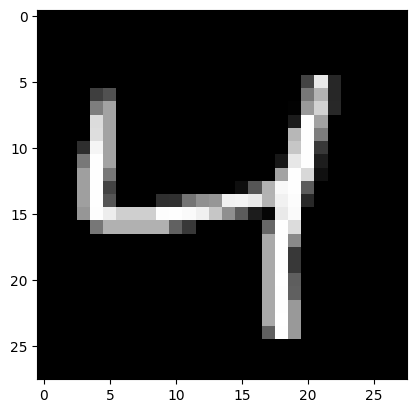

In [ ]:
plt.imshow(xtrain[2,:,:],cmap='gray')

In [ ]:
ytrain[2]

4

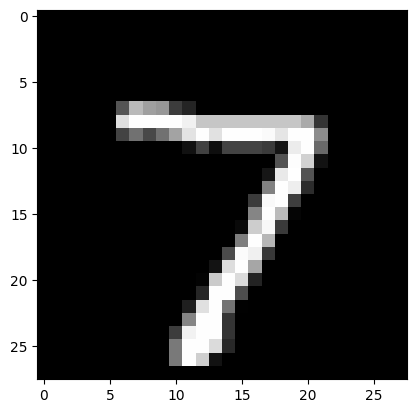

In [ ]:
plt.imshow(xtest[0,:,:],cmap='gray')

In [ ]:
ytest[0]

7

In [ ]:
L=pd.DataFrame(ytrain)
L[0].value_counts()

0
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [ ]:
x_train=xtrain.reshape(xtrain.shape[0],784).astype('float32')
x_test=xtest.reshape(xtest.shape[0],784).astype('float32')
x_test.shape

(10000, 784)

In [ ]:
x_train/=255
x_test/=255
y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest, 10)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(784,activation='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=100, batch_size=256, verbose=1)

Epoch 1/100
235/235 [==============================] - 7s 21ms/step - loss: 0.2742 - accuracy: 0.9219
Epoch 2/100
235/235 [==============================] - 6s 24ms/step - loss: 0.0945 - accuracy: 0.9717
Epoch 3/100
235/235 [==============================] - 6s 25ms/step - loss: 0.0610 - accuracy: 0.9816
Epoch 4/100
235/235 [==============================] - 5s 21ms/step - loss: 0.0412 - accuracy: 0.9874
Epoch 5/100
235/235 [==============================] - 6s 27ms/step - loss: 0.0276 - accuracy: 0.9917
Epoch 6/100
235/235 [==============================] - 5s 21ms/step - loss: 0.0196 - accuracy: 0.9939
Epoch 7/100
235/235 [==============================] - 6s 25ms/step - loss: 0.0152 - accuracy: 0.9955
Epoch 8/100
235/235 [==============================] - 6s 24ms/step - loss: 0.0119 - accuracy: 0.9963
Epoch 9/100
235/235 [==============================] - 5s 21ms/step - loss: 0.0095 - accuracy: 0.9972
Epoch 10/100
235/235 [==============================] - 6s 27ms/step - loss: 0.006

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.985
Loss: 0.129


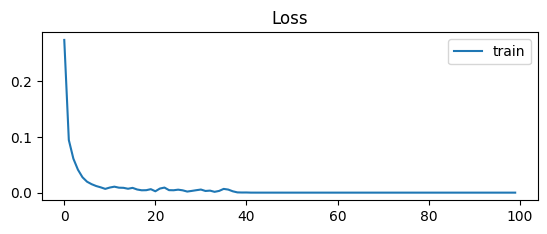

In [ ]:
from numpy import where
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()

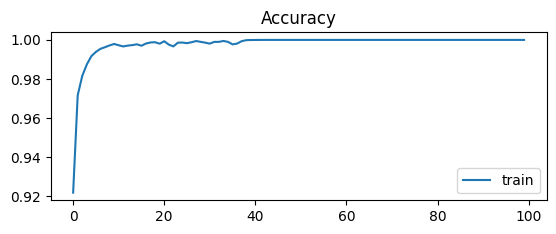

In [ ]:
%matplotlib inline
from matplotlib import pyplot
from numpy import where

# plot loss during training
pyplot.subplot(211)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()

In [ ]:
y_predict = model.predict(x_test)
y_predict[0]

313/313 [==============================] - 2s 6ms/step


array([1.5512001e-24, 4.2442169e-21, 1.6551673e-23, 5.6519418e-21,
       4.8851391e-28, 1.3187734e-24, 2.9985676e-34, 9.9999994e-01,
       1.8196131e-25, 3.9936051e-20], dtype=float32)

In [ ]:
np.argmax(y_predict[0])

7

In [ ]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[ 972    1    0    2    1    1    1    1    1    0]
 [   0 1127    2    1    0    1    2    0    2    0]
 [   4    1 1013    1    1    0    2    5    4    1]
 [   0    0    1  999    0    4    0    2    2    2]
 [   1    1    3    0  964    0    5    0    2    6]
 [   2    0    0    7    1  874    3    2    2    1]
 [   2    2    0    1    4    4  944    0    1    0]
 [   1    1    9    0    0    0    0 1009    2    6]
 [   2    0    2    3    1    0    0    3  961    2]
 [   3    2    0    2    5    2    1    4    1  989]]


In [ ]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

